In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
data=pd.read_excel('TRAIN.xlsx',index_col=False)

In [3]:
data['Airline'].nunique()

12

In [4]:
data["Arrival Time"].nunique()

1236

In [5]:
data.describe()

,Price
count,9000.000000
mean,9087.764333
std,4605.498942
min,1759.000000
25%,5228.000000
50%,8369.000000
75%,12373.000000
max,79512.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
Airline              9000 non-null object
Date                 9000 non-null object
Departure Station    9000 non-null object
Arrival Station      9000 non-null object
Route Map            9000 non-null object
Departure Time       9000 non-null object
Arrival Time         9000 non-null object
Journey Time         9000 non-null object
Stops                9000 non-null object
Extra Info           9000 non-null object
Price                9000 non-null int64
dtypes: int64(1), object(10)
memory usage: 773.5+ KB


In [7]:
data.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
data['Extra Info']=le.fit_transform(data['Extra Info'])

In [11]:
data.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,7,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,7,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,7,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,7,13302


In [12]:
data['Airline']=le.fit_transform(data['Airline'])
data['Departure Station']=le.fit_transform(data['Departure Station'])
data['Arrival Station']=le.fit_transform(data['Arrival Station'])

In [13]:
lst=[]
for i in data['Stops']:
    l=i.split(' ')[0]
    lst.append(l)
lst1=[0 if(i=='non-stop') else int(i) for i in lst]

In [14]:
data['stops']=lst1

In [15]:
data["Date"]=pd.to_datetime(data['Date'])
data['Month']=data['Date'].dt.month

In [16]:
data['Day']=data['Date'].dt.day

In [17]:
data=data.drop(['Stops','Date','Route Map'],1)

In [18]:
data.head()

,Airline,Departure Station,Arrival Station,Departure Time,Arrival Time,Journey Time,Extra Info,Price,stops,Month,Day
0,3,0,5,22:20,01:10 22 Mar,2h 50m,7,3897,0,3,24
1,1,3,0,05:50,13:15,7h 25m,7,7662,2,1,5
2,4,2,1,09:25,04:25 10 Jun,19h,7,13882,2,9,6
3,3,3,0,18:05,23:30,5h 25m,7,6218,1,12,5
4,3,0,5,16:50,21:35,4h 45m,7,13302,1,1,3


In [19]:
out=data['Price']

In [20]:
lst=[]
for i in data['Journey Time']:
    l=i.split(' ')
    h=l[0].split('h')[0]
    hr=int(h[0])
    if(len(l)==2):
        m=l[1].split('m')
        mi=int(m[0])
    else:
        mi=0
    t=(hr*60)+mi
    lst.append(t)

In [21]:
data['Journey_Time']=lst

In [22]:
data=data.drop('Journey Time',1)

In [23]:
lst=[]
for i in data['Arrival Time']:
    l=i.split(' ')[0]
    lst.append(l)

In [24]:
data["Arrival_Time"]=lst

In [25]:
data=data.drop('Arrival Time',1)

In [26]:
data.head()

,Airline,Departure Station,Arrival Station,Departure Time,Extra Info,Price,stops,Month,Day,Journey_Time,Arrival_Time
0,3,0,5,22:20,7,3897,0,3,24,170,01:10
1,1,3,0,05:50,7,7662,2,1,5,445,13:15
2,4,2,1,09:25,7,13882,2,9,6,60,04:25
3,3,3,0,18:05,7,6218,1,12,5,325,23:30
4,3,0,5,16:50,7,13302,1,1,3,285,21:35


In [27]:
data['Arrival_Time']=le.fit_transform(data['Arrival_Time'])

In [28]:
data['Departure Time']=le.fit_transform(data['Departure Time'])

In [29]:
data['Journey_Time']=le.fit_transform(data['Journey_Time'])

In [30]:
data.head()

,Airline,Departure Station,Arrival Station,Departure Time,Extra Info,Price,stops,Month,Day,Journey_Time,Arrival_Time
0,3,0,5,209,7,3897,0,3,24,22,12
1,1,3,0,30,7,7662,2,1,5,77,103
2,4,2,1,69,7,13882,2,9,6,0,30
3,3,3,0,163,7,6218,1,12,5,53,215
4,3,0,5,148,7,13302,1,1,3,45,192


In [31]:
inp=data.drop('Price',1)



# Splitting our data to Test data and Train data


In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=48)

# Applying DescisionTree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtree_mod=DecisionTreeRegressor()
dtree_mod.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [34]:
ypred=dtree_mod.predict(xtest)
ypred

array([ 8567., 14151.,  6144., ...,  7832.,  4937.,  4174.])

In [35]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,ypred)
mse

4413242.013425926

In [36]:
rmse=np.sqrt(mse)

In [37]:
rmse

2100.7717661435586

# Applying Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
rand_mod=RandomForestRegressor()

In [39]:
rand_mod.fit(xtrain,ytrain)

C:\Users\Bezza Pavan Kumar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [40]:
rf_ypred=rand_mod.predict(xtest)
rf_ypred

array([ 7208.4, 14151. ,  5721.2, ...,  7645.1,  4404.9,  4237. ])

In [41]:
rf_mse=mean_squared_error(rf_ypred,ytest)

In [42]:
rf_rmse=np.sqrt(rf_mse)

In [43]:
rf_rmse

1666.2729894725699

# Applying Adaboost Regressor 

In [44]:
from sklearn.ensemble import AdaBoostRegressor
ada_mod=AdaBoostRegressor()
ada_mod.fit(xtrain,ytrain)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [45]:
ada_ypred=ada_mod.predict(xtest)

In [46]:
ada_mse=mean_squared_error(ada_ypred,ytest)
ada_mse

12230056.52856299

In [47]:
ada_rmse=np.sqrt(ada_mse)
ada_rmse

3497.149772109137

# Applying Catboost Regressor

In [48]:
from catboost import CatBoostRegressor
cat_mod=CatBoostRegressor()
cat_mod.fit(xtrain,ytrain)

0:	learn: 4475.5728729	total: 136ms	remaining: 2m 15s
1:	learn: 4397.0976062	total: 180ms	remaining: 1m 29s
2:	learn: 4321.9015066	total: 220ms	remaining: 1m 13s
3:	learn: 4254.1279916	total: 265ms	remaining: 1m 5s
4:	learn: 4178.9432105	total: 315ms	remaining: 1m 2s
5:	learn: 4119.9145622	total: 356ms	remaining: 58.9s
6:	learn: 4053.2862839	total: 418ms	remaining: 59.4s
7:	learn: 3977.4587163	total: 465ms	remaining: 57.7s
8:	learn: 3912.9514320	total: 505ms	remaining: 55.6s
9:	learn: 3857.0081851	total: 558ms	remaining: 55.3s
10:	learn: 3806.7659087	total: 610ms	remaining: 54.8s
11:	learn: 3747.9509473	total: 666ms	remaining: 54.8s
12:	learn: 3685.9533057	total: 710ms	remaining: 53.9s
13:	learn: 3639.9588937	total: 769ms	remaining: 54.2s
14:	learn: 3599.3213488	total: 823ms	remaining: 54.1s
15:	learn: 3546.7033957	total: 864ms	remaining: 53.2s
16:	learn: 3502.1549966	total: 899ms	remaining: 52s
17:	learn: 3458.9026346	total: 954ms	remaining: 52s
18:	learn: 3423.7947129	total: 1.01s	re

155:	learn: 2018.4819221	total: 8.39s	remaining: 45.4s
156:	learn: 2016.3129082	total: 8.44s	remaining: 45.3s
157:	learn: 2013.7370156	total: 8.48s	remaining: 45.2s
158:	learn: 2011.7627730	total: 8.53s	remaining: 45.1s
159:	learn: 2010.4858141	total: 8.6s	remaining: 45.1s
160:	learn: 2007.7158046	total: 8.64s	remaining: 45s
161:	learn: 2004.5902458	total: 8.69s	remaining: 44.9s
162:	learn: 2002.4889802	total: 8.73s	remaining: 44.8s
163:	learn: 2001.1092279	total: 8.77s	remaining: 44.7s
164:	learn: 1999.0903476	total: 8.82s	remaining: 44.6s
165:	learn: 1997.9874664	total: 8.87s	remaining: 44.6s
166:	learn: 1996.1078727	total: 8.91s	remaining: 44.5s
167:	learn: 1993.9757218	total: 8.96s	remaining: 44.4s
168:	learn: 1992.1781249	total: 9s	remaining: 44.2s
169:	learn: 1988.9832523	total: 9.04s	remaining: 44.2s
170:	learn: 1987.9946043	total: 9.09s	remaining: 44.1s
171:	learn: 1984.8092306	total: 9.13s	remaining: 44s
172:	learn: 1982.6680166	total: 9.18s	remaining: 43.9s
173:	learn: 1980.6

306:	learn: 1832.7845310	total: 15.4s	remaining: 34.8s
307:	learn: 1831.7288878	total: 15.5s	remaining: 34.7s
308:	learn: 1831.5178929	total: 15.5s	remaining: 34.7s
309:	learn: 1831.1866188	total: 15.6s	remaining: 34.6s
310:	learn: 1830.8333008	total: 15.6s	remaining: 34.5s
311:	learn: 1830.2529201	total: 15.6s	remaining: 34.5s
312:	learn: 1829.7387742	total: 15.7s	remaining: 34.4s
313:	learn: 1829.5342664	total: 15.7s	remaining: 34.4s
314:	learn: 1829.3934214	total: 15.8s	remaining: 34.3s
315:	learn: 1828.0097522	total: 15.8s	remaining: 34.3s
316:	learn: 1827.3404272	total: 15.9s	remaining: 34.2s
317:	learn: 1826.2571560	total: 15.9s	remaining: 34.2s
318:	learn: 1824.7668463	total: 16s	remaining: 34.1s
319:	learn: 1822.8326956	total: 16s	remaining: 34.1s
320:	learn: 1822.4863549	total: 16.1s	remaining: 34s
321:	learn: 1822.0793103	total: 16.1s	remaining: 33.9s
322:	learn: 1821.5121274	total: 16.2s	remaining: 33.9s
323:	learn: 1820.1107157	total: 16.2s	remaining: 33.8s
324:	learn: 1819

457:	learn: 1751.9020395	total: 22.6s	remaining: 26.7s
458:	learn: 1751.4082487	total: 22.6s	remaining: 26.7s
459:	learn: 1750.5147037	total: 22.7s	remaining: 26.6s
460:	learn: 1750.1481704	total: 22.7s	remaining: 26.6s
461:	learn: 1749.9756159	total: 22.8s	remaining: 26.5s
462:	learn: 1749.1504823	total: 22.8s	remaining: 26.5s
463:	learn: 1748.9579281	total: 22.9s	remaining: 26.4s
464:	learn: 1748.8247710	total: 22.9s	remaining: 26.4s
465:	learn: 1748.5316340	total: 23s	remaining: 26.3s
466:	learn: 1747.8831316	total: 23s	remaining: 26.3s
467:	learn: 1747.0475447	total: 23.1s	remaining: 26.2s
468:	learn: 1746.8129643	total: 23.1s	remaining: 26.2s
469:	learn: 1746.5603266	total: 23.1s	remaining: 26.1s
470:	learn: 1745.6285807	total: 23.2s	remaining: 26.1s
471:	learn: 1745.0126140	total: 23.3s	remaining: 26s
472:	learn: 1744.3602784	total: 23.3s	remaining: 26s
473:	learn: 1742.8340292	total: 23.3s	remaining: 25.9s
474:	learn: 1742.7076100	total: 23.4s	remaining: 25.9s
475:	learn: 1742.2

608:	learn: 1685.3488565	total: 29.8s	remaining: 19.2s
609:	learn: 1685.0093743	total: 29.9s	remaining: 19.1s
610:	learn: 1684.8605766	total: 29.9s	remaining: 19.1s
611:	learn: 1684.6537171	total: 30s	remaining: 19s
612:	learn: 1683.9659926	total: 30s	remaining: 19s
613:	learn: 1683.6500756	total: 30.1s	remaining: 18.9s
614:	learn: 1683.3742633	total: 30.1s	remaining: 18.9s
615:	learn: 1683.2726076	total: 30.2s	remaining: 18.8s
616:	learn: 1683.1696026	total: 30.2s	remaining: 18.8s
617:	learn: 1682.8974284	total: 30.3s	remaining: 18.7s
618:	learn: 1681.9613466	total: 30.3s	remaining: 18.7s
619:	learn: 1681.6507982	total: 30.4s	remaining: 18.6s
620:	learn: 1681.1379670	total: 30.4s	remaining: 18.6s
621:	learn: 1680.9434672	total: 30.5s	remaining: 18.5s
622:	learn: 1680.5535597	total: 30.5s	remaining: 18.5s
623:	learn: 1680.2860717	total: 30.6s	remaining: 18.4s
624:	learn: 1679.9494990	total: 30.6s	remaining: 18.4s
625:	learn: 1679.3640265	total: 30.7s	remaining: 18.3s
626:	learn: 1678.7

761:	learn: 1639.0158669	total: 37.3s	remaining: 11.7s
762:	learn: 1638.6626678	total: 37.4s	remaining: 11.6s
763:	learn: 1638.4117394	total: 37.4s	remaining: 11.6s
764:	learn: 1638.3845565	total: 37.5s	remaining: 11.5s
765:	learn: 1638.1944897	total: 37.5s	remaining: 11.5s
766:	learn: 1637.9815655	total: 37.6s	remaining: 11.4s
767:	learn: 1637.8796863	total: 37.6s	remaining: 11.4s
768:	learn: 1637.4774684	total: 37.6s	remaining: 11.3s
769:	learn: 1636.9659782	total: 37.7s	remaining: 11.3s
770:	learn: 1636.8987771	total: 37.7s	remaining: 11.2s
771:	learn: 1636.8146815	total: 37.8s	remaining: 11.2s
772:	learn: 1636.6103484	total: 37.8s	remaining: 11.1s
773:	learn: 1635.8312832	total: 37.9s	remaining: 11.1s
774:	learn: 1635.6293810	total: 37.9s	remaining: 11s
775:	learn: 1634.8567692	total: 38s	remaining: 11s
776:	learn: 1634.7523046	total: 38s	remaining: 10.9s
777:	learn: 1634.6589279	total: 38.1s	remaining: 10.9s
778:	learn: 1634.1243416	total: 38.1s	remaining: 10.8s
779:	learn: 1633.9

913:	learn: 1596.5031498	total: 44.6s	remaining: 4.2s
914:	learn: 1595.9512685	total: 44.7s	remaining: 4.15s
915:	learn: 1595.6739231	total: 44.7s	remaining: 4.1s
916:	learn: 1595.3584253	total: 44.7s	remaining: 4.05s
917:	learn: 1595.2432256	total: 44.8s	remaining: 4s
918:	learn: 1594.9634688	total: 44.8s	remaining: 3.95s
919:	learn: 1594.7910451	total: 44.9s	remaining: 3.9s
920:	learn: 1594.5912940	total: 44.9s	remaining: 3.85s
921:	learn: 1594.4422678	total: 45s	remaining: 3.8s
922:	learn: 1594.2232828	total: 45s	remaining: 3.75s
923:	learn: 1593.9164127	total: 45.1s	remaining: 3.71s
924:	learn: 1593.6431903	total: 45.1s	remaining: 3.66s
925:	learn: 1593.4706551	total: 45.2s	remaining: 3.61s
926:	learn: 1593.0639595	total: 45.2s	remaining: 3.56s
927:	learn: 1592.6983416	total: 45.3s	remaining: 3.51s
928:	learn: 1592.1164780	total: 45.3s	remaining: 3.46s
929:	learn: 1592.0389606	total: 45.4s	remaining: 3.41s
930:	learn: 1591.8538916	total: 45.4s	remaining: 3.37s
931:	learn: 1591.3052

In [49]:
cat_ypred=cat_mod.predict(xtest)

In [50]:
cat_mse=mean_squared_error(cat_ypred,ytest)

In [51]:
cat_rmse=np.sqrt(cat_mse)
cat_rmse

2114.8580887833546

# Taking Random forest model as final model. Hence RMSE value for random forset  is low  when compared to the RMSE values of other models.

In [52]:
final_model=rand_mod.fit(xtrain,ytrain)

In [53]:
yypred=final_model.predict(xtest)

In [54]:
yypred

array([ 6436.7, 13896.7,  4713.9, ...,  7645.1,  4443.7,  4174. ])

# Fitting Test_Data

In [55]:
test_data=pd.read_excel('TEST-11.xlsx')

In [56]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 10 columns):
Airline              1683 non-null object
Date                 1683 non-null object
Departure Station    1683 non-null object
Arrival Station      1683 non-null object
Route Map            1682 non-null object
Departure Time       1683 non-null object
Arrival Time         1683 non-null object
Journey Time         1683 non-null object
Stops                1682 non-null object
Extra Info           1683 non-null object
dtypes: object(10)
memory usage: 131.6+ KB


In [57]:
test_data.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info
0,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → DEL → BLR,20:25,21:05 10 May,24h 40m,1 stop,No info
1,GoAir,15/04/2019,Banglore,Delhi,BLR → DEL,20:55,23:40,2h 45m,non-stop,No info
2,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,04:25 13 Jun,18h 45m,2 stops,In-flight meal not included
3,SpiceJet,18/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included
4,SpiceJet,24/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No info


In [58]:
test_data['Departure Station']=le.fit_transform(test_data['Departure Station'])

In [59]:
test_data['Airline']=le.fit_transform(test_data['Airline'])

In [60]:
test_data['Arrival Station']=le.fit_transform(test_data['Arrival Station'])

In [61]:
test_data['Departure Time']=le.fit_transform(test_data['Departure Time'])

In [62]:
test_data['Extra Info']=le.fit_transform(test_data['Extra Info'])

In [63]:
lst=[]
for i in test_data['Journey Time']:
    l=i.split(' ')
    h=l[0].split('h')[0]
    hr=int(h[0])
    if(len(l)==2):
        m=l[1].split('m')
        mi=int(m[0])
    else:
        mi=0
    t=(hr*60)+mi
    lst.append(t)

In [64]:
lst=[]
for i in test_data['Journey Time']:
    l=i.split(' ')
    h=l[0].split('h')[0]
    hr=int(h)
    if(len(l)==2):
        m=l[1].split('m')[0]
        mi=int(m)
    else:
        mi=0
    t=(hr*60)+mi
    lst.append(t)

In [65]:
test_data['Journey_Time']=lst

In [66]:
test_data.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Journey_Time
0,4,9/05/2019,3,0,CCU → DEL → BLR,163,21:05 10 May,24h 40m,1 stop,7,1480
1,2,15/04/2019,0,2,BLR → DEL,168,23:40,2h 45m,non-stop,7,165
2,4,12/06/2019,2,1,DEL → JAI → BOM → COK,61,04:25 13 Jun,18h 45m,2 stops,4,1125
3,8,18/03/2019,0,5,BLR → DEL,24,08:35,2h 50m,non-stop,6,170
4,8,24/05/2019,0,2,BLR → DEL,26,08:35,2h 40m,non-stop,7,160


In [67]:
test_data["Date"]=pd.to_datetime(test_data['Date'])
test_data['Month']=test_data['Date'].dt.month

In [68]:
test_data['Day']=test_data['Date'].dt.day

In [69]:
lst=[]
for i in test_data['Arrival Time']:
    l=i.split(' ')[0]
    lst.append(l)

In [70]:
test_data['Arrival_Time']=lst

In [71]:
test_data['Arrival_Time']=le.fit_transform(test_data['Arrival_Time'])

In [72]:
test_data['Stops']=test_data['Stops'].fillna('1 stop')

In [73]:
test_data.Stops.replace('non-stop',0,inplace=True)
test_data.Stops.replace('1 stop',1,inplace=True)
test_data.Stops.replace('2 stops',2,inplace=True)
test_data.Stops.replace('3 stops',3,inplace=True)
test_data.Stops.replace('4 stops',4,inplace=True)

In [74]:
test_data=test_data.drop(['Date','Route Map','Arrival Time','Journey Time'],1)

In [75]:
final_ypred=final_model.predict(test_data)

In [76]:
final_price=pd.DataFrame()

In [77]:
lst=[]
for i in final_ypred:
    l=round(i)
    lst.append(l)

In [78]:
final_price['Price']=lst

In [79]:
final_price=final_price.set_index('Price')

In [80]:
final_price.to_csv('Flight_Prices_Output.csv')

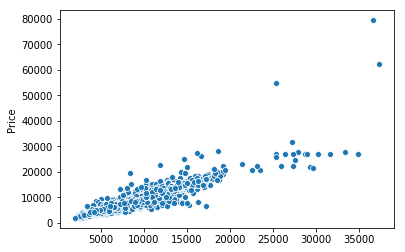

In [81]:
sb.scatterplot(yypred,ytest)

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>